## Python project: Zeros of polynomials with 0,1 coefficients
---
In this Jupyter notebook we will explain how to use Python to recreate the interesting image on page 319 of the paper
**Zeros of polynomials with 0,1 coefficients'**, B. Poonen, A.M. Odlyzko. *L'Enseignement Math.* **39** (1993), 317-348.
 
First, you may want to run the cell below to display the image of interest from the paper.

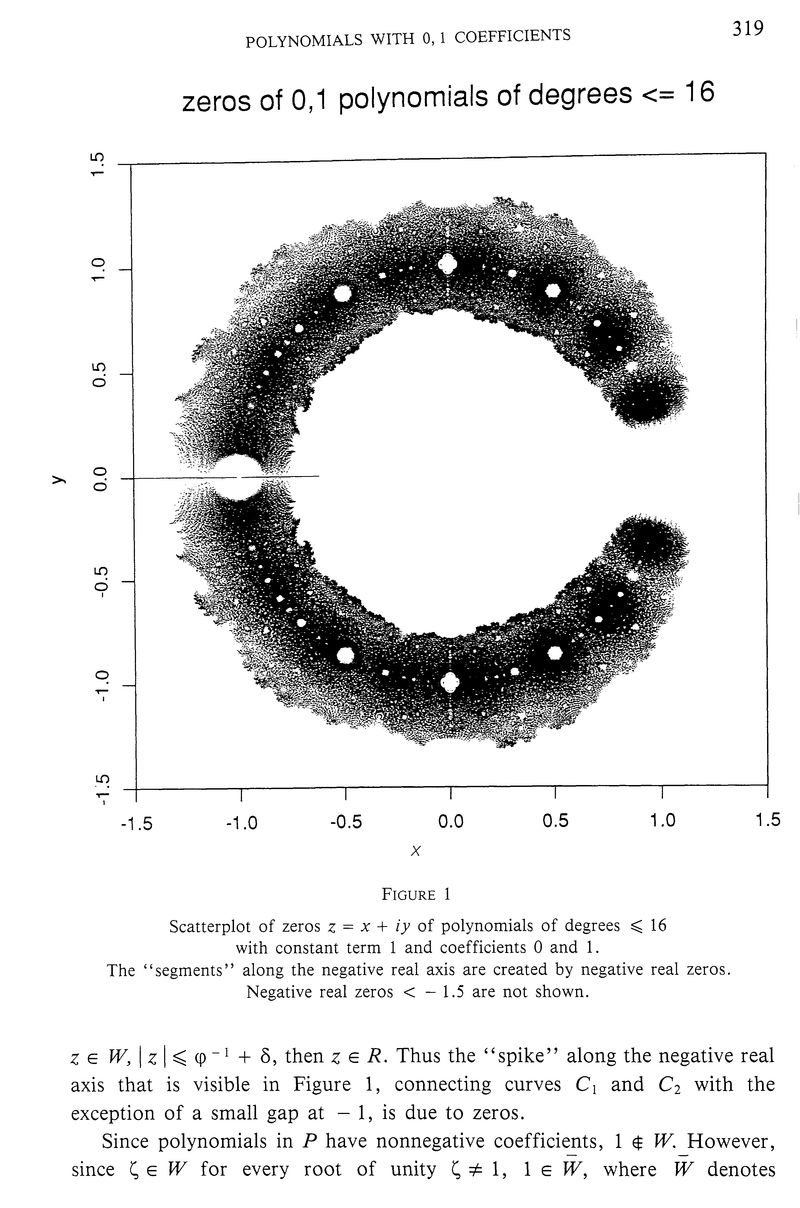

In [1]:
from PIL import Image
Image.open( "C:\Users\jajaco3\Documents\GitHub\ResearchPresentation\zeros\PoonenOdlyzkoImage.png")


As described in the caption, this image is the zeros of all polynomials

$$ a_n x^n +  a_{n-1}x^{n-1} + \cdots + a_1 x + 1=0\\$$ 
$$a_i\in \{0,1\}$$

of degree $n\leq 16$.

That is why $x=0+0j$ doesn't appear as a root in their picture.

We have no problem about speed in finding roots for $n\leq 16$, so we draw here the zeros of all polynomials

$$ a_n x^n +  a_{n-1}x^{n-1} + \cdots + a_1 x + a_0=0\\$$ 
$$a_i\in \{0,1\}$$

of degree $n\leq 16$ (doing it this way is inefficient as we repeat root calculations).

In the cell below, we start by importing a function from Itertools, a package of ready-made tools for very particular types of iteration. 

With pdmax, we declare the maximum degree of polynomial to find roots for.

We use the function 'product' from 'itertools' to iterate a complete list of all possible 0,1 coefficients of polynomials of degree less than or equal to pdmax.

Run the cell below to understand what I mean.

In [41]:
from itertools import product
pdmax = 16
coefficients = list(product(range(2), repeat = pdmax ))
coefficients

[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Next we use the image package to create a png file with 'imgx' times 'imgy' pixels. 

In [20]:
imgx = 1080
imgy = 1080
image = Image.new("1", (imgx, imgy), "white")

We next import the python package numpy which contains the function 'roots' we will use to find roots.

In [4]:
import numpy

In the next cell, the numbers 'xa', 'xb', 'ya', and 'yb' determine a rectangle

$$[xa,xb]\times [ya,yb]$$

We will draw, as pixels in the png file, all the roots $a+bj$ in the plane for which $(a,b)$ fit into this rectangle.

In [ ]:
# rectangle to include roots from
xa = -1.5
xb = 1.5
ya = -1.5
yb = 1.5

The Python Imaging Library is based upon an upside down standard Cartesian pixel coordinate system. For example, $(0,0)$ refers to the pixel in the upper left corner of the image, $(0, imgy-1)$ is the pixel in the lower left corner, $(imgx -1, imgy -1)$ is the pixel in the lower right corner, and $(imgx-1, 0)$ the pixel in the upper right corner. 

When drawing the image, we rescale the roots to fit into the grid of pixels and reflect y so that the picture we draw follows the standard cartesian coordinates. For example, run the cell below to see which pixel the imaginary number $j$ appears as. 


In [39]:
kx = (imgx -1) * (1j.real -xa) / (xb -xa)  # rescale real coordinate to pixel
ky = (imgy -1) - (imgy-1) * (1j.imag - ya) / (yb - ya) # rescale imaginary coordinate to pixel
pixelFori = (int(kx), int(ky))
print pixelFori

(539, 179)


The code we use to draw the image is based upon source code that accompanied the article *A Digital Slice of Pi* in Scientific American Magazine, May 2003, by Wayt Gibbs.

Run the cell below. This will draw the image by placing a black pixel wherever a root appears and it will display the image just created.

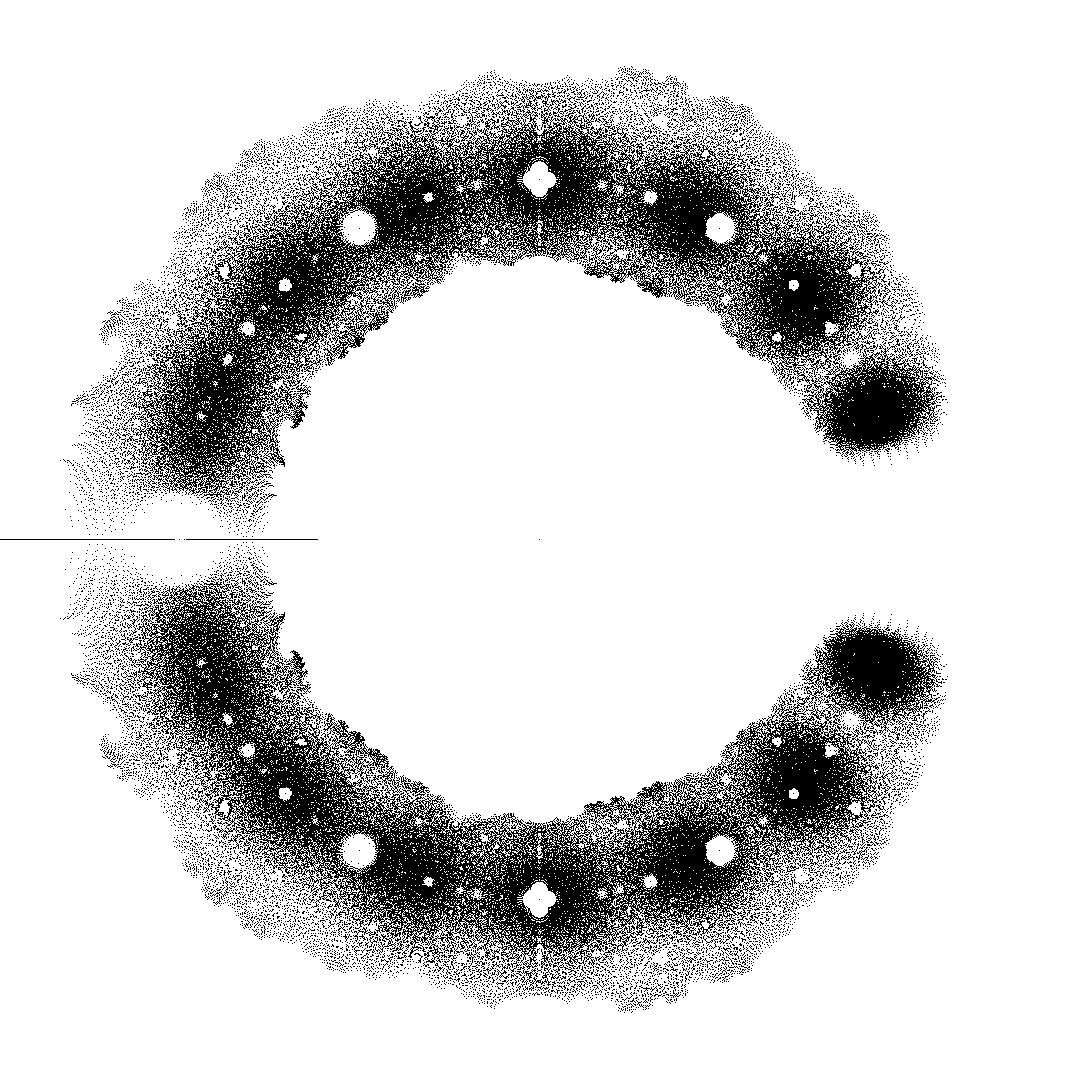

In [40]:
for p in range(len(coefficients)):
    roots = numpy.roots(coefficients[p])
    for k in range(len(roots)):
        kx = (imgx - 1) * (roots[k].real - xa) / (xb - xa) # rescale real coordinate to pixel
        ky = (imgy -1) - (imgy - 1) * (roots[k].imag - ya) / (yb - ya) # rescale imaginary coordinate to pixel
        if kx >= 0 and kx <= imgx -1 and ky >= 0 and ky <= imgy - 1:
                image.putpixel((int(kx), int(ky)), 0) # place black dot for root, 
            
image.save("1080ResAllDegreeLessEqual16.png", "PNG")
Image.open("1080ResAllDegreeLessEqual16.png")